In [1]:
# Import some libraries we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import scipy.sparse as sps
from sklearn.model_selection import train_test_split

In [4]:
business_data = pd.read_csv('CSV/business.csv')
business_data.head(1)

,hours.Wednesday,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,postal_code,attributes.Smoking,hours.Thursday,attributes.DietaryRestrictions,city,...,attributes.RestaurantsAttire,hours.Sunday,attributes.GoodForMeal,attributes.GoodForDancing,attributes.AcceptsInsurance,attributes.RestaurantsReservations,attributes,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating
0,11:0-21:0,False,NaN,NaN,NaN,T2E 6L6,NaN,11:0-21:0,NaN,Calgary,...,casual,NaN,NaN,NaN,NaN,True,"{'BusinessParking': ""{'garage': False, 'street...",True,False,False


In [5]:
review_data = pd.read_csv('CSV/review.csv')
review_data.head()

,funny,user_id,review_id,text,business_id,stars,date,useful,cool
0,0,msQe1u7Z_XuqjGoqhB0J5g,x7mDIiDB3jEiPGPHOmDzyw,The pizza was okay. Not the best I've had. I p...,iCQpiavjjPzJ5_3gPD5Ebg,2,2011-02-25,0,0
1,0,msQe1u7Z_XuqjGoqhB0J5g,dDl8zu1vWPdKGihJrwQbpw,I love this place! My fiance And I go here atl...,pomGBqfbxcqPv14c3XH-ZQ,5,2012-11-13,0,0
2,1,msQe1u7Z_XuqjGoqhB0J5g,LZp4UX5zK3e-c5ZGSeo3kA,Terrible. Dry corn bread. Rib tips were all fa...,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,3,1
3,0,msQe1u7Z_XuqjGoqhB0J5g,Er4NBWCmCD4nM8_p1GRdow,Back in 2005-2007 this place was my FAVORITE t...,elqbBhBfElMNSrjFqW3now,2,2011-02-25,2,0
4,0,msQe1u7Z_XuqjGoqhB0J5g,jsDu6QEJHbwP2Blom1PLCA,Delicious healthy food. The steak is amazing. ...,Ums3gaP2qM3W1XcA5r6SsQ,5,2014-09-05,0,0


In [6]:
restaurant_data = business_data[business_data['categories'].str.contains("Restaurants",na=False)]

In [7]:
restaurant_toronto = restaurant_data.loc[restaurant_data['city'] == 'Toronto']

In [8]:
restaurant_vegas = restaurant_data.loc[restaurant_data['city'] == 'Las Vegas']

In [9]:
restaurant_phoenix = restaurant_data.loc[restaurant_data['city'] == 'Phoenix']

In [10]:
restaurant_data['city'].value_counts().head(10)

Toronto        7578
Las Vegas      6148
Phoenix        3832
Montréal       3532
Calgary        2794
Charlotte      2578
Pittsburgh     2305
Scottsdale     1509
Cleveland      1418
Mississauga    1403
Name: city, dtype: int64

In [11]:
restaurant_toronto['business_id'].head(5)

11    tZnSodhPwNr4bzrwJ1CSbw
27    PMDlKLd0Mxj0ngCpuUmE5Q
80    YIez_A3WOt9J2SXN7OMa2Q
88    mr3rQcYBKWu2L6o7qtQ9Wg
97    cuXCQM-9VwpZlSneEY1b3w
Name: business_id, dtype: object

In [12]:
review_rest_toronto = pd.merge(restaurant_toronto, review_data, on='business_id', how='left')

In [13]:
review_rest_toronto[review_rest_toronto['business_id'] == 'tZnSodhPwNr4bzrwJ1CSbw'].head(2)

,hours.Wednesday,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,postal_code,attributes.Smoking,hours.Thursday,attributes.DietaryRestrictions,city,...,attributes.BikeParking,attributes.OutdoorSeating,funny,user_id,review_id,text,stars_y,date,useful,cool
0,17:0-1:0,False,NaN,False,NaN,M6G 2L7,NaN,17:0-1:0,NaN,Toronto,...,True,True,1,ibftnXIQUhOvYhWCIyfRng,yhYSVAaD7P7S7HNyHJGDeA,The food was fantastic. We tried the hush pupp...,4,2013-01-27,0,0
1,17:0-1:0,False,NaN,False,NaN,M6G 2L7,NaN,17:0-1:0,NaN,Toronto,...,True,True,0,UkghXQuglpbzGpUhTKCBNg,66HiC6DlCY-y_gmciPq7hg,Went here yesterday for a friend and my birthd...,4,2012-02-12,0,0


In [14]:
review_rest_phoenix = pd.merge(restaurant_phoenix, review_data, on='business_id', how='left')
review_rest_vegas = pd.merge(restaurant_vegas, review_data, on='business_id', how='left')

In [15]:
toronto_df = review_rest_toronto
vegas_df = review_rest_vegas
phoenix_df = review_rest_phoenix

In [16]:
toronto_df.head()

,hours.Wednesday,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,postal_code,attributes.Smoking,hours.Thursday,attributes.DietaryRestrictions,city,...,attributes.BikeParking,attributes.OutdoorSeating,funny,user_id,review_id,text,stars_y,date,useful,cool
0,17:0-1:0,False,NaN,False,NaN,M6G 2L7,NaN,17:0-1:0,NaN,Toronto,...,True,True,1,ibftnXIQUhOvYhWCIyfRng,yhYSVAaD7P7S7HNyHJGDeA,The food was fantastic. We tried the hush pupp...,4,2013-01-27,0,0
1,17:0-1:0,False,NaN,False,NaN,M6G 2L7,NaN,17:0-1:0,NaN,Toronto,...,True,True,0,UkghXQuglpbzGpUhTKCBNg,66HiC6DlCY-y_gmciPq7hg,Went here yesterday for a friend and my birthd...,4,2012-02-12,0,0
2,17:0-1:0,False,NaN,False,NaN,M6G 2L7,NaN,17:0-1:0,NaN,Toronto,...,True,True,0,cu0ZyRh7GJyRqEeGKFDBkA,OvZTHaXwtXDCx8SEdxnZSA,This restaurant continues to be one of my FAVO...,5,2015-09-11,0,0
3,17:0-1:0,False,NaN,False,NaN,M6G 2L7,NaN,17:0-1:0,NaN,Toronto,...,True,True,0,uLQJAaULt91a263PsRyEqQ,heGJTjK2S8kHCZu3GupUfA,We went to Southern Accent last night for a la...,4,2012-02-19,0,0
4,17:0-1:0,False,NaN,False,NaN,M6G 2L7,NaN,17:0-1:0,NaN,Toronto,...,True,True,0,TfCpklkr3m5yobUwclxMEw,1s9_0nHtbW7ZO2223_fBRA,I'm from the deep south (about an hour from Ne...,5,2012-06-19,0,0


In [17]:
toronto_df.shape

(336912, 69)

In [18]:
user_ratings = toronto_df.groupby('user_id').agg(['count','mean']).reset_index()
user_ratings_400 = user_ratings[user_ratings['stars_y']['count'] > 400]
user_ratings_400.head()

user_id stars_x           latitude             \
                                count      mean    count       mean   
17644  CxDOIDnH8gp9KXzpBHJYXw     934  3.537473      934  43.712193   
34270  Q9mA60HnY87C1TW5kjAZ6Q     470  3.544681      470  43.655139   
38637  TbhyP24zYZqZ2VJZgu1wrg     402  3.497512      402  43.660219   

      attributes.RestaurantsPriceRange2           is_open           longitude  \
                                  count      mean   count      mean     count   
17644                               899  1.913237     934  0.682013       934   
34270                               460  1.882609     470  0.753191       470   
38637                               399  1.924812     402  0.661692       402   

         ...    review_count             funny           stars_y            \
         ...           count        mean count      mean   count      mean   
17644    ...             934  109.632762   934  1.661670     934  3.246253   
34270    ...             470  114.612766   470  3.178723     470  3.961702   
38637    ...             402  146.487562   402  1.686567     402  3.432836   

      useful            cool            
       count      mean count      mean  
17644    934  3.600642   934  2.228051  
34270    470  5.614894   470  4.587234  
38637    402  3.435323   402  2.039801  

[3 rows x 21 columns]

In [19]:
highest_rated_user_toronto = toronto_df[toronto_df['user_id'] == 'CxDOIDnH8gp9KXzpBHJYXw']
highest_rated_user_toronto.head(5)

,hours.Wednesday,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,postal_code,attributes.Smoking,hours.Thursday,attributes.DietaryRestrictions,city,...,attributes.BikeParking,attributes.OutdoorSeating,funny,user_id,review_id,text,stars_y,date,useful,cool
355,17:0-22:0,True,NaN,NaN,False,M4G 3C1,no,17:0-22:0,NaN,Toronto,...,True,False,2,CxDOIDnH8gp9KXzpBHJYXw,mA67I3BMBB_L2UjsNAxi0g,I love the concept of Indian Street Food Compa...,3,2016-06-24,3,2
1309,10:0-0:0,NaN,NaN,NaN,NaN,M5B 1Y7,NaN,10:0-0:0,NaN,Toronto,...,NaN,False,4,CxDOIDnH8gp9KXzpBHJYXw,fq2ukBle7ZPtx4hQovpqrg,Irish Potato Nachos is brand new take out food...,3,2011-03-30,8,8
1952,11:0-22:0,True,NaN,NaN,NaN,M5T 2G6,NaN,12:0-22:0,NaN,Toronto,...,True,False,5,CxDOIDnH8gp9KXzpBHJYXw,i5OT-YcJR_kipKlLW0P05w,I have been wanting to come and try Anh Dao Re...,3,2011-04-08,6,6
2210,11:0-23:0,False,NaN,False,NaN,M1S,NaN,11:0-23:0,NaN,Toronto,...,True,False,0,CxDOIDnH8gp9KXzpBHJYXw,-ksOnZkiI1HF-6xI_faamQ,2.5 Star for lunch Experience which offers Chi...,2,2017-02-08,11,4
2600,11:0-19:0,False,NaN,NaN,NaN,M1S 2C1,NaN,11:0-19:0,NaN,Toronto,...,True,False,0,CxDOIDnH8gp9KXzpBHJYXw,s_7_-xucyLG4EDjtIGK0CA,Today Special's Honey Green Tea for $1.99 + $0...,3,2017-02-25,8,2


In [20]:
vegas_df.head()

,hours.Wednesday,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,postal_code,attributes.Smoking,hours.Thursday,attributes.DietaryRestrictions,city,...,attributes.BikeParking,attributes.OutdoorSeating,funny,user_id,review_id,text,stars_y,date,useful,cool
0,11:0-18:0,False,NaN,NaN,NaN,89106,NaN,11:0-18:0,NaN,Las Vegas,...,True,NaN,0,jSD05fFrAFa5gX3ZQae1tw,UgwmWy_68S_aKR9wTWKGOg,I am a huge fan of both locally owned business...,3,2015-08-02,4,1
1,11:0-18:0,False,NaN,NaN,NaN,89106,NaN,11:0-18:0,NaN,Las Vegas,...,True,NaN,2,oagZh5A2cWJXZBLakS_KpQ,AywPsODuQbUMhBEjmKiGXw,Let me start off by saying. If you cant make a...,1,2015-06-08,8,2
2,11:0-18:0,False,NaN,NaN,NaN,89106,NaN,11:0-18:0,NaN,Las Vegas,...,True,NaN,0,6BSwuyc7fvcccJgrY4_W5Q,6j39TEUBDBTEK37OKACWLw,Decent product. ..HORRIBLE service. Totally un...,1,2015-08-08,2,1
3,9:0-21:0,False,NaN,NaN,NaN,89128,NaN,9:0-21:0,NaN,Las Vegas,...,True,False,0,ih7Dmu7wZpKVwlBRbakJOQ,c6iTbCMMYWnOd79ZiWwobg,"I ordered a few 12 inch sandwiches , a turkey ...",1,2016-07-03,1,0
4,9:0-21:0,False,NaN,NaN,NaN,89128,NaN,9:0-21:0,NaN,Las Vegas,...,True,False,2,zqL43wHcz133AVvEuba67w,fisvc16rY1Q5NTX_O_QQ2A,A very dirty place. You can watch the employee...,1,2010-06-20,3,0


In [21]:
vegas_df.shape

(1053072, 69)

In [22]:
user_ratings = vegas_df.groupby('user_id').agg(['count','mean']).reset_index()
user_ratings_1000 = user_ratings[user_ratings['stars_y']['count'] > 1000]
user_ratings_1000.head(10)

user_id stars_x           latitude             \
                                 count      mean    count       mean   
236650  bLbSNkLggFnqwNNzzq-Ijw    1271  3.906373     1271  36.133986   

       attributes.RestaurantsPriceRange2           is_open            \
                                   count      mean   count      mean   
236650                              1263  1.653207    1271  0.755311   

       longitude    ...    review_count            funny           stars_y  \
           count    ...           count       mean count      mean   count   
236650      1271    ...            1271  377.45712  1271  6.601101    1271   

                 useful             cool            
            mean  count       mean count      mean  
236650  3.287175   1271  12.846577  1271  8.789929  

[1 rows x 21 columns]

In [23]:
highest_rated_user_vegas = vegas_df[vegas_df['user_id'] == 'bLbSNkLggFnqwNNzzq-Ijw']
highest_rated_user_vegas.head(5)

,hours.Wednesday,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,postal_code,attributes.Smoking,hours.Thursday,attributes.DietaryRestrictions,city,...,attributes.BikeParking,attributes.OutdoorSeating,funny,user_id,review_id,text,stars_y,date,useful,cool
476,0:0-0:0,False,NaN,NaN,NaN,89117,NaN,0:0-0:0,NaN,Las Vegas,...,True,True,0,bLbSNkLggFnqwNNzzq-Ijw,YnB3ZEQzDWad_-VjOARCLQ,Great patio seating for afternoon dining- shad...,3,2014-05-11,3,3
1881,NaN,False,NaN,NaN,NaN,89119,NaN,NaN,NaN,Las Vegas,...,False,False,4,bLbSNkLggFnqwNNzzq-Ijw,lEYm2UpipyZWfhrtxJBtJQ,"I like the Metro brand, but I think they need ...",3,2016-09-05,13,8
1941,11:0-22:0,True,NaN,NaN,NaN,89103,NaN,11:0-22:0,NaN,Las Vegas,...,False,False,5,bLbSNkLggFnqwNNzzq-Ijw,m0JS8RIMA_Gi8fP3uz-S0w,I had high hopes for this place- tried to go y...,1,2014-03-26,5,2
2133,11:0-22:30,False,NaN,NaN,NaN,89129,NaN,11:0-22:30,NaN,Las Vegas,...,True,False,2,bLbSNkLggFnqwNNzzq-Ijw,AXTf9dyWGSs1rk0VTZNSvg,The majority of the low reviews for this place...,4,2015-05-22,8,4
5549,9:0-21:0,False,NaN,NaN,False,89102,outdoor,9:0-21:0,NaN,Las Vegas,...,True,True,17,bLbSNkLggFnqwNNzzq-Ijw,o95QLR9VxuDx6Xij5tZ2pg,Cue the meat sweats- this place has the bigges...,4,2017-02-04,25,20


In [24]:
phoenix_df.head()

,hours.Wednesday,attributes.RestaurantsDelivery,attributes.Open24Hours,attributes.DogsAllowed,attributes.CoatCheck,postal_code,attributes.Smoking,hours.Thursday,attributes.DietaryRestrictions,city,...,attributes.BikeParking,attributes.OutdoorSeating,funny,user_id,review_id,text,stars_y,date,useful,cool
0,11:0-22:0,False,NaN,NaN,False,85007,outdoor,11:0-22:0,NaN,Phoenix,...,True,True,0,UfUFjbwLpYCeJrWUWdMYVA,lM_XM7e1nD7d7NJ815inuA,Cozy neighborhood sports bar w good burgers. L...,4,2015-05-11,2,0
1,11:0-22:0,False,NaN,NaN,False,85007,outdoor,11:0-22:0,NaN,Phoenix,...,True,True,0,VWDL0VgQ2ivpN3oYhL_WsA,ACW_G1G0PG0GNyGUPfI3UA,The bad: the bar closes at 10pm. It seems lik...,4,2010-08-14,0,0
2,11:0-22:0,False,NaN,NaN,False,85007,outdoor,11:0-22:0,NaN,Phoenix,...,True,True,0,SoL4ToJdvxWpGGzxYVA86A,KKJa4pRGwq8eO6YCdhjNoA,"Good food, good vibes, good service. All adds ...",5,2014-07-29,1,1
3,11:0-22:0,False,NaN,NaN,False,85007,outdoor,11:0-22:0,NaN,Phoenix,...,True,True,0,JIj2V2YaM5_8jVtnkLSZ5g,zSa_s88VlxYzeiHHTlK6xw,My wife and I were referred to this place by a...,5,2015-11-08,0,0
4,11:0-22:0,False,NaN,NaN,False,85007,outdoor,11:0-22:0,NaN,Phoenix,...,True,True,5,BoJQWDp2a9sxUMrlJBTfRA,1wYTbfyQ0bfM31nM9c3hsA,My boyfriend likes burgers...I don't. Not real...,3,2009-09-24,4,3


In [25]:
phoenix_df.shape

(376171, 69)

In [26]:
user_ratings = phoenix_df.groupby('user_id').agg(['count','mean']).reset_index()
user_ratings_500 = user_ratings[user_ratings['stars_y']['count'] > 500]
user_ratings_500.head(10)

Empty DataFrame
Columns: [(user_id, ), (stars_x, count), (stars_x, mean), (latitude, count), (latitude, mean), (attributes.RestaurantsPriceRange2, count), (attributes.RestaurantsPriceRange2, mean), (is_open, count), (is_open, mean), (longitude, count), (longitude, mean), (review_count, count), (review_count, mean), (funny, count), (funny, mean), (stars_y, count), (stars_y, mean), (useful, count), (useful, mean), (cool, count), (cool, mean)]
Index: []

[0 rows x 21 columns]

In [27]:
drop_cols = []
print 'PERCENTAGE OF MISSING VALUES'
for col in highest_rated_user_vegas.columns:
    numofnull = highest_rated_user_vegas[col].isnull().sum()
    missing = (float(numofnull)/float(highest_rated_user_vegas.shape[0])) * 100
    if missing > 60:
        drop_cols.append(col)

PERCENTAGE OF MISSING VALUES


In [28]:
print drop_cols

['attributes.Open24Hours', 'attributes.DogsAllowed', 'attributes.CoatCheck', 'attributes.Smoking', 'attributes.DietaryRestrictions', 'attributes.BYOB', 'attributes.AgesAllowed', 'attributes.HairSpecializesIn', 'attributes.RestaurantsCounterService', 'attributes.Corkage', 'attributes.BusinessAcceptsBitcoin', 'attributes.HappyHour', 'attributes.BYOBCorkage', 'attributes.BestNights', 'attributes.ByAppointmentOnly', 'attributes.DriveThru', 'attributes.Music', 'attributes.GoodForDancing', 'attributes.AcceptsInsurance']


In [29]:
x =  highest_rated_user_vegas.loc[~highest_rated_user_vegas['attributes.HairSpecializesIn'].isnull()]
highest_rated_user_vegas.drop(x.index, axis = 0, inplace = True)

/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [30]:
hrs = []
for col in highest_rated_user_vegas.columns:
    if 'hour' in col:
        hrs.append(col)
highest_rated_user_vegas.drop(hrs,axis = 1,inplace = True)

In [31]:
drop_cols = []
print 'PERCENTAGE OF MISSING VALUES'
for col in highest_rated_user_vegas.columns:
    numofnull = highest_rated_user_vegas[col].isnull().sum()
    missing = (float(numofnull)/float(highest_rated_user_vegas.shape[0])) * 100
    if missing > 60:
        drop_cols.append(col)

PERCENTAGE OF MISSING VALUES


In [32]:
print drop_cols

['attributes.Open24Hours', 'attributes.DogsAllowed', 'attributes.CoatCheck', 'attributes.Smoking', 'attributes.DietaryRestrictions', 'attributes.BYOB', 'attributes.AgesAllowed', 'attributes.HairSpecializesIn', 'attributes.RestaurantsCounterService', 'attributes.Corkage', 'attributes.BusinessAcceptsBitcoin', 'attributes.HappyHour', 'attributes.BYOBCorkage', 'attributes.BestNights', 'attributes.ByAppointmentOnly', 'attributes.DriveThru', 'attributes.Music', 'attributes.GoodForDancing', 'attributes.AcceptsInsurance']


In [33]:
highest_rated_user_vegas.drop(drop_cols, axis=1, inplace=True)

In [34]:
not_related = ['attributes', 'city', 'stars_x', 'latitude', 'longitude', 'postal_code', 'business_id', 'categories', 'name', 'address', 'state']
not_related1 =['funny', 'user_id', 'review_id', 'date', 'useful', 'cool']
highest_rated_user_vegas.drop(not_related, axis=1, inplace=True)
highest_rated_user_vegas.drop(not_related1, axis=1, inplace=True)

ambience, businessparking, goodformeal

In [35]:
highest_rated_user_vegas['attributes.Ambience'].head(2).value_counts()

{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}     1
{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}    1
Name: attributes.Ambience, dtype: int64

In [36]:
ambience_df = pd.DataFrame(columns=['romantic', 'intimate', 'classy', 'hipster', 'divey', 'touristy', 'trendy','upscale', 'casual'])

In [37]:
from numpy import nan as Nan
def addrow(x):
    global ambience_df
    cols = ['romantic', 'intimate', 'classy', 'hipster', 'divey', 'touristy', 'trendy','upscale', 'casual']
    if not isinstance(x, basestring):
        s2 = pd.Series([Nan for i in range(len(cols))], index = cols)
        ambience_df = ambience_df.append(s2, ignore_index = True)
        return
    x = x.replace('{', '')
    x = x.replace('}', '')
    x = x.replace('\'','')
    ls = x.split(',')
    hm = {}
    for l in ls:
        l = l.split(':')
        hm[l[0].strip()] = l[1]
    ambience_df = ambience_df.append(hm, ignore_index = True)
highest_rated_user_vegas['attributes.Ambience'].apply(lambda x:addrow(x))
ambience_df.head()

,romantic,intimate,classy,hipster,divey,touristy,trendy,upscale,casual
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True


In [38]:
highest_rated_user_vegas['attributes.BusinessParking'].head(2).value_counts()

{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}     1
{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}    1
Name: attributes.BusinessParking, dtype: int64

In [39]:
parking_df = pd.DataFrame(columns=['garage', 'street', 'validated', 'lot', 'valet'])

In [40]:
from numpy import nan as Nan
def addrow(x):
    global parking_df
    cols = ['garage', 'street', 'validated', 'lot', 'valet']
    if not isinstance(x, basestring):
        s2 = pd.Series([Nan for i in range(len(cols))], index = cols)
        parking_df = parking_df.append(s2, ignore_index = True)
        return
    x = x.replace('{', '')
    x = x.replace('}', '')
    x = x.replace('\'','')
    ls = x.split(',')
    hm = {}
    for l in ls:
        l = l.split(':')
        hm[l[0].strip()] = l[1]
    parking_df = parking_df.append(hm, ignore_index = True)
highest_rated_user_vegas['attributes.BusinessParking'].apply(lambda x:addrow(x))
parking_df.head()

,garage,street,validated,lot,valet
0,False,False,False,True,False
1,False,False,False,False,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,False,False


In [41]:
highest_rated_user_vegas['attributes.GoodForMeal'].value_counts().head(2)

{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'breakfast': False, 'brunch': False}     373
{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'breakfast': False, 'brunch': False}    136
Name: attributes.GoodForMeal, dtype: int64

In [42]:
meal_df = pd.DataFrame(columns = ['dessert', 'latenight', 'lunch', 'dinner', 'breakfast', 'brunch'])

In [43]:
from numpy import nan as Nan
def addrow(x):
    global meal_df
    cols = ['dessert', 'latenight', 'lunch', 'dinner', 'breakfast', 'brunch']
    if not isinstance(x, basestring):
        s2 = pd.Series([Nan for i in range(len(cols))], index = cols)
        meal_df = meal_df.append(s2, ignore_index = True)
        return
    x = x.replace('{', '')
    x = x.replace('}', '')
    x = x.replace('\'','')
    ls = x.split(',')
    hm = {}
    for l in ls:
        l = l.split(':')
        hm[l[0].strip()] = l[1]
    meal_df = meal_df.append(hm, ignore_index = True)
highest_rated_user_vegas['attributes.GoodForMeal'].apply(lambda x:addrow(x))
meal_df.head()

,dessert,latenight,lunch,dinner,breakfast,brunch
0,False,True,True,True,False,False
1,False,False,True,False,False,False
2,False,False,True,False,False,False
3,True,False,True,True,False,False
4,True,False,True,True,False,True


In [44]:
print highest_rated_user_vegas.shape
print meal_df.shape
print parking_df.shape
print ambience_df.shape

(1271, 25)
(1271, 6)
(1271, 5)
(1271, 9)


In [45]:
print highest_rated_user_vegas.columns
print meal_df.columns
print parking_df.columns
print ambience_df.columns

Index([u'attributes.RestaurantsDelivery', u'attributes.GoodForKids',
       u'attributes.Alcohol', u'attributes.RestaurantsPriceRange2',
       u'attributes.RestaurantsTableService',
       u'attributes.RestaurantsGoodForGroups',
       u'attributes.WheelchairAccessible', u'attributes.Caters', u'is_open',
       u'neighborhood', u'attributes.Ambience', u'review_count',
       u'attributes.NoiseLevel', u'attributes.BusinessAcceptsCreditCards',
       u'attributes.HasTV', u'attributes.BusinessParking', u'attributes.WiFi',
       u'attributes.RestaurantsAttire', u'attributes.GoodForMeal',
       u'attributes.RestaurantsReservations', u'attributes.RestaurantsTakeOut',
       u'attributes.BikeParking', u'attributes.OutdoorSeating', u'text',
       u'stars_y'],
      dtype='object')
Index([u'dessert', u'latenight', u'lunch', u'dinner', u'breakfast', u'brunch'], dtype='object')
Index([u'garage', u'street', u'validated', u'lot', u'valet'], dtype='object')
Index([u'romantic', u'intimate', u'cla

In [46]:
cols = ['attributes.GoodForMeal', 'attributes.GoodForMeal', 'attributes.BusinessParking']
highest_rated_user_vegas.drop(cols, axis = 1, inplace=True)

In [47]:
highest_rated_user_vegas = highest_rated_user_vegas.reset_index()
highest_rated_user_vegas.head()

,index,attributes.RestaurantsDelivery,attributes.GoodForKids,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.RestaurantsTableService,attributes.RestaurantsGoodForGroups,attributes.WheelchairAccessible,attributes.Caters,is_open,...,attributes.BusinessAcceptsCreditCards,attributes.HasTV,attributes.WiFi,attributes.RestaurantsAttire,attributes.RestaurantsReservations,attributes.RestaurantsTakeOut,attributes.BikeParking,attributes.OutdoorSeating,text,stars_y
0,476,False,True,full_bar,2.0,True,True,True,False,1,...,True,True,no,casual,True,True,True,True,Great patio seating for afternoon dining- shad...,3
1,1881,False,True,none,1.0,False,True,NaN,False,1,...,True,False,no,casual,False,True,False,False,"I like the Metro brand, but I think they need ...",3
2,1941,True,True,none,1.0,True,True,True,True,0,...,True,False,no,casual,True,True,False,False,I had high hopes for this place- tried to go y...,1
3,2133,False,True,beer_and_wine,2.0,True,True,True,False,1,...,True,True,no,casual,True,True,True,False,The majority of the low reviews for this place...,4
4,5549,False,True,beer_and_wine,1.0,True,True,True,True,1,...,True,True,no,casual,True,True,True,True,Cue the meat sweats- this place has the bigges...,4


In [48]:
highest_rated_user_vegas = pd.concat([highest_rated_user_vegas, parking_df, meal_df, ambience_df], axis = 1)
highest_rated_user_vegas.head()

,index,attributes.RestaurantsDelivery,attributes.GoodForKids,attributes.Alcohol,attributes.RestaurantsPriceRange2,attributes.RestaurantsTableService,attributes.RestaurantsGoodForGroups,attributes.WheelchairAccessible,attributes.Caters,is_open,...,brunch,romantic,intimate,classy,hipster,divey,touristy,trendy,upscale,casual
0,476,False,True,full_bar,2.0,True,True,True,False,1,...,False,False,False,False,False,False,False,False,False,True
1,1881,False,True,none,1.0,False,True,NaN,False,1,...,False,False,False,False,False,False,False,False,False,False
2,1941,True,True,none,1.0,True,True,True,True,0,...,False,False,False,False,False,False,False,False,False,True
3,2133,False,True,beer_and_wine,2.0,True,True,True,False,1,...,False,False,False,False,False,False,False,False,False,True
4,5549,False,True,beer_and_wine,1.0,True,True,True,True,1,...,True,False,False,False,False,False,False,False,False,True


In [49]:
cols = ['attributes.Ambience', 'index', 'text']
highest_rated_user_vegas.drop(cols, axis = 1, inplace = True)

In [50]:
for col in highest_rated_user_vegas.columns:
    print col
    print '--------------------------'
    print highest_rated_user_vegas[col].unique()
    print '--------------------------'

attributes.RestaurantsDelivery
--------------------------
[False True nan]
--------------------------
attributes.GoodForKids
--------------------------
[True False nan]
--------------------------
attributes.Alcohol
--------------------------
['full_bar' 'none' 'beer_and_wine' nan]
--------------------------
attributes.RestaurantsPriceRange2
--------------------------
[ 2.  1.  3.  4. nan]
--------------------------
attributes.RestaurantsTableService
--------------------------
[True False nan]
--------------------------
attributes.RestaurantsGoodForGroups
--------------------------
[True False nan]
--------------------------
attributes.WheelchairAccessible
--------------------------
[True nan False]
--------------------------
attributes.Caters
--------------------------
[False True nan]
--------------------------
is_open
--------------------------
[1 0]
--------------------------
neighborhood
--------------------------
['Westside' 'Southeast' 'Chinatown' 'Northwest' 'Summerlin' nan 'Dow

In [51]:
highest_rated_user_vegas = highest_rated_user_vegas.fillna('missing')

In [52]:
skip  = ['review_count', 'stars_y']
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in highest_rated_user_vegas.columns:
    if col not in skip:
        highest_rated_user_vegas[col]= labelencoder.fit_transform(highest_rated_user_vegas[col])

In [53]:
train, test = train_test_split(highest_rated_user_vegas, random_state = 8675309)

In [54]:
print train.shape
print test.shape

(953, 41)
(318, 41)


In [55]:
X_train = train.drop('stars_y', axis = 1)
Y_train = train['stars_y']
X_test = test.drop('stars_y', axis = 1)
Y_test = test['stars_y']

In [56]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 42)

In [57]:
from sklearn.model_selection import GridSearchCV

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
dt_grid = { 'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf}

In [58]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dt_search = GridSearchCV(estimator = dt, param_grid = dt_grid, cv = 3, n_jobs = 3, scoring = 'neg_mean_squared_error')
# Fit the random search model
dt_search.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'max_features': ['auto', 'sqrt', 'log2', None], 'min_samples_split': [2, 5, 10], 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [59]:
result = pd.DataFrame(dt_search.cv_results_)
result.head()

/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.010242,0.001970,-0.972154,-0.163288,10,auto,1,2,"{u'max_features': u'auto', u'min_samples_split...",343,-1.143656,-0.117801,-0.964796,-0.178087,-0.807493,-0.193977,0.001020,0.000113,0.137300,0.032812
1,0.005504,0.000645,-0.943789,-0.197512,10,auto,1,5,"{u'max_features': u'auto', u'min_samples_split...",311,-1.074752,-0.162641,-0.901720,-0.208402,-0.854615,-0.221493,0.000877,0.000076,0.094651,0.025230
2,0.004047,0.000485,-0.813538,-0.265183,10,auto,1,10,"{u'max_features': u'auto', u'min_samples_split...",139,-0.863712,-0.239843,-0.805007,-0.271304,-0.771765,-0.284404,0.000529,0.000035,0.038010,0.018700
3,0.004504,0.000615,-0.910065,-0.206756,10,auto,2,2,"{u'max_features': u'auto', u'min_samples_split...",276,-1.046147,-0.175626,-0.896443,-0.215212,-0.787220,-0.229431,0.000283,0.000115,0.106117,0.022765
4,0.005848,0.000721,-0.895039,-0.219390,10,auto,2,5,"{u'max_features': u'auto', u'min_samples_split...",274,-0.955192,-0.185731,-0.945838,-0.227023,-0.783737,-0.245417,0.001091,0.000210,0.078672,0.024957


In [60]:
dt_search.best_score_

-0.6678424169477818

In [61]:
dt_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [62]:
dt_new = DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [63]:
dt_new.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [64]:
from sklearn.tree import export_graphviz
from IPython.display import Image

export_graphviz(dt_new, filled=True, rounded=True, special_characters=True, feature_names=list(X_train.columns))

/anaconda2/lib/python2.7/site-packages/sklearn/tree/export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


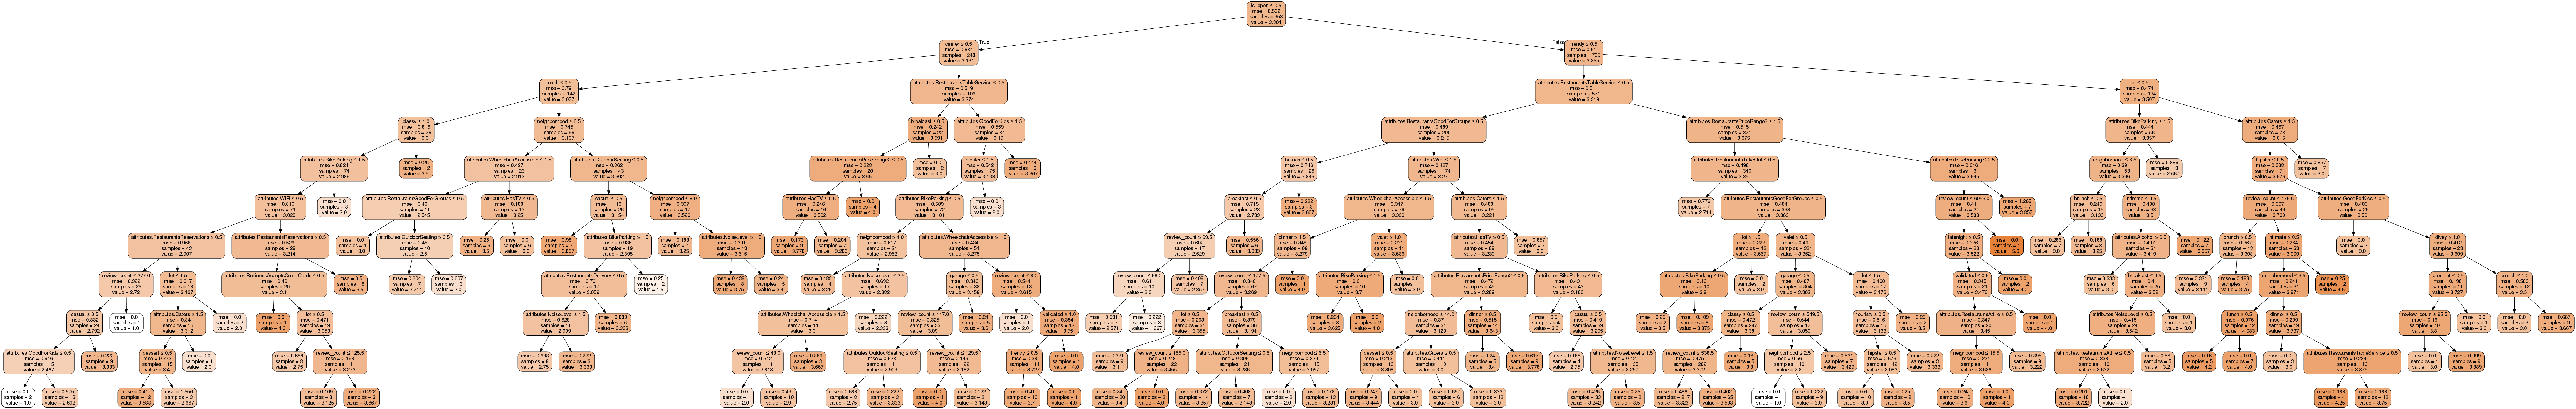

In [69]:
Image(filename='latesttree.png')

In [66]:
pred = dt_new.predict(X_test)

In [67]:
print pred.shape
print Y_test.shape

(318,)
(318,)


In [68]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test.values, pred)

0.6856484310531785